Problem statement: To test the efffectiveness of drug that could potentially reduce the chance of cognitive impairement and dementia in diabetic patients.

In [32]:
import pandas as pd
import numpy as np
import csv
# Show floats with 2 decimals
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import f_oneway, ttest_ind

In [33]:
data = pd.read_csv('test-report.csv')
data.head()

,treated/ untreated/ Sham,Rat ID,Sex,BW,BG,Total exploration time on familiar object (baseline),Recognition Index on familiar object (RI) (Baseline),Total exploration time on Novel Object (Baseline),Recognition Index on Novel object (RI) (Baseline),Total exploration time on familiar object (34W ),Recognition Index on familiar object(RI)(34W),Total exploration time on Novel Object (34W),Recognition Index on Novel object (RI)(34W),Cumulative duration in Closed Arm (Baseline),Cumulative duration in open Arm (Baseline),Cumulative duration in Center Zone of Maze (Baseline),Cumulative duration in Closed Arm (34W),Cumulative duration in open Arm (34W),Cumulative duration in Center Zone of Maze(34W)
0,untreated,T-25,male,535,284,32.80,0.53,51.84,0.63,34.16,0.64,41.32,0.78,282.60,0.00,16.56,47.00,115.30,130.08
1,untreated,T-26,male,551,353,30.44,0.55,53.96,0.75,45.68,0.48,57.44,0.77,209.60,30.80,57.88,201.80,38.40,56.76
2,untreated,T-27,male,433,335,51.72,0.62,42.72,0.59,50.20,0.42,35.16,0.58,253.20,13.20,29.28,59.90,48.90,182.12
3,untreated,T-35,male,436,320,34.16,0.53,24.96,0.56,70.64,0.50,88.44,0.55,218.00,32.90,45.56,167.00,13.40,108.68
4,untreated,T-36,male,415,500,21.32,0.79,55.12,0.05,57.72,0.34,46.80,0.94,193.10,44.50,59.52,191.40,0.30,106.32


In [34]:
data.isna().sum()

treated/ untreated/ Sham                                 0
Rat ID                                                   0
Sex                                                      0
BW                                                       0
BG                                                       0
Total exploration time on  familiar object (baseline)    0
Recognition Index on familiar object (RI) (Baseline)     0
Total exploration time on Novel Object (Baseline)        0
Recognition Index on Novel object (RI) (Baseline)        0
Total exploration time on  familiar object (34W )        0
Recognition Index on familiar object(RI)(34W)            0
Total exploration time on Novel Object (34W)             0
Recognition Index on Novel object (RI)(34W)              0
Cumulative duration in Closed Arm (Baseline)             0
Cumulative duration in open Arm (Baseline)               0
Cumulative duration in Center Zone of Maze (Baseline)    0
Cumulative duration in Closed Arm (34W)                 

In [35]:
data.dtypes

treated/ untreated/ Sham                                  object
Rat ID                                                    object
Sex                                                       object
BW                                                         int64
BG                                                         int64
Total exploration time on  familiar object (baseline)    float64
Recognition Index on familiar object (RI) (Baseline)     float64
Total exploration time on Novel Object (Baseline)        float64
Recognition Index on Novel object (RI) (Baseline)        float64
Total exploration time on  familiar object (34W )        float64
Recognition Index on familiar object(RI)(34W)            float64
Total exploration time on Novel Object (34W)             float64
Recognition Index on Novel object (RI)(34W)              float64
Cumulative duration in Closed Arm (Baseline)             float64
Cumulative duration in open Arm (Baseline)               float64
Cumulative duration in Ce

Null hypothesis ( H0 ): There will be significant difference between BW & BG of different groups (treated/ untreated/ Sham)of animals.

Alternative hypothesis ( H1 ): There will be no significant difference between BW & BG of different groups (treated/ untreated/ Sham) of animals.


In [36]:
data.rename(columns={
    'Recognition Index on familiar object (RI) (Baseline)': 'RI_FO_baseline',
    'Recognition Index on Novel object (RI) (Baseline)': 'RI_NO_baseline',
    'Recognition Index on familiar object(RI)(34W)': 'RI_FO_34W',
    'Recognition Index on Novel object (RI)(34W)': 'RI_NO_34W',
    'Cumulative duration in Closed Arm (Baseline)': 'CD_CA_baseline',
    'Cumulative duration in open Arm (Baseline)': 'CD_OA_baseline',
    'Cumulative duration in Center Zone of Maze (Baseline)': 'CD_CZ_baseline',
    'Cumulative duration in Closed Arm (34W)': 'CD_CA_34W',
    'Cumulative duration in open Arm (34W)': 'CD_OA_34W',
    'Cumulative duration in Center Zone of Maze(34W)': 'CD_CZ_34W'
}, inplace=True)

In [37]:
data.head()

,treated/ untreated/ Sham,Rat ID,Sex,BW,BG,Total exploration time on familiar object (baseline),RI_FO_baseline,Total exploration time on Novel Object (Baseline),RI_NO_baseline,Total exploration time on familiar object (34W ),RI_FO_34W,Total exploration time on Novel Object (34W),RI_NO_34W,CD_CA_baseline,CD_OA_baseline,CD_CZ_baseline,CD_CA_34W,CD_OA_34W,CD_CZ_34W
0,untreated,T-25,male,535,284,32.80,0.53,51.84,0.63,34.16,0.64,41.32,0.78,282.60,0.00,16.56,47.00,115.30,130.08
1,untreated,T-26,male,551,353,30.44,0.55,53.96,0.75,45.68,0.48,57.44,0.77,209.60,30.80,57.88,201.80,38.40,56.76
2,untreated,T-27,male,433,335,51.72,0.62,42.72,0.59,50.20,0.42,35.16,0.58,253.20,13.20,29.28,59.90,48.90,182.12
3,untreated,T-35,male,436,320,34.16,0.53,24.96,0.56,70.64,0.50,88.44,0.55,218.00,32.90,45.56,167.00,13.40,108.68
4,untreated,T-36,male,415,500,21.32,0.79,55.12,0.05,57.72,0.34,46.80,0.94,193.10,44.50,59.52,191.40,0.30,106.32


In [38]:
df= data[['treated/ untreated/ Sham','Rat ID','BG','RI_FO_baseline','RI_NO_baseline','RI_FO_34W','RI_NO_34W','CD_CA_baseline','CD_OA_baseline','CD_CZ_baseline','CD_CA_34W','CD_OA_34W','CD_CZ_34W','BW']]

In [39]:
df.head()

,treated/ untreated/ Sham,Rat ID,BG,RI_FO_baseline,RI_NO_baseline,RI_FO_34W,RI_NO_34W,CD_CA_baseline,CD_OA_baseline,CD_CZ_baseline,CD_CA_34W,CD_OA_34W,CD_CZ_34W,BW
0,untreated,T-25,284,0.53,0.63,0.64,0.78,282.60,0.00,16.56,47.00,115.30,130.08,535
1,untreated,T-26,353,0.55,0.75,0.48,0.77,209.60,30.80,57.88,201.80,38.40,56.76,551
2,untreated,T-27,335,0.62,0.59,0.42,0.58,253.20,13.20,29.28,59.90,48.90,182.12,433
3,untreated,T-35,320,0.53,0.56,0.50,0.55,218.00,32.90,45.56,167.00,13.40,108.68,436
4,untreated,T-36,500,0.79,0.05,0.34,0.94,193.10,44.50,59.52,191.40,0.30,106.32,415


Null hypothesis ( H0 ): There should be no significant difference in the BG & BW among the treated and untreated groups of baseline.                                                                                                                                                                                                                                                    Alternative hypothesis ( H1 ): There should be difference in the BG & BW among the treated and untreated groups of baseline.

In [40]:
import scipy.stats as st
BW_treated = df[df['treated/ untreated/ Sham']=='treated']['BW']
BW_untreated = df[df['treated/ untreated/ Sham']=='untreated']['BW']

st.f_oneway(BW_treated,BW_untreated)

F_onewayResult(statistic=2.198283910965044, pvalue=0.15375131376452225)

In [41]:
BG_treated = df[df['treated/ untreated/ Sham']=='treated']['BG']
BG_untreated = df[df['treated/ untreated/ Sham']=='untreated']['BG']

st.f_oneway(BG_treated,BG_untreated)

F_onewayResult(statistic=0.005720897109894314, pvalue=0.9404596862837258)

Conclusion: As p-values in both the case are greater than 0.05, therefore we can not reject the null hypotheses and we can say that there is no significant difference in the BG & BW among the treated and untreated groups of baseline.

Null hypothesis ( H0 ): There should be no significant difference in the RI between the group at baseline.                                                                                                                                             Alternative hypothesis ( H1 ): There should be significant difference in the RI between the group at baseline.


In [42]:
RI_treated_baseline = df[(df['treated/ untreated/ Sham'] == 'treated')]['RI_NO_baseline']
RI_untreated_baseline = df[(df['treated/ untreated/ Sham'] == 'untreated')]['RI_NO_baseline']
RI_Sham_baseline = df[(df['treated/ untreated/ Sham'] == 'Sham')]['RI_NO_baseline']
st.f_oneway(RI_treated_baseline,RI_untreated_baseline,RI_Sham_baseline)

F_onewayResult(statistic=2.406055521478822, pvalue=0.10924767543274785)

Conclusion:As p-value is greater than 0.05, therfore we can not reject Null hypotheses and we can say that there should be no significance difference in RI between the group at baseline.

Null hypothesis ( H0 ): There should be significant difference in the RI between the group after 34W. 
Alternative hypothesis ( H1 ): There should be no significant difference in the RI between the group after 34W.


In [43]:
RI_treated_34W = df[(df['treated/ untreated/ Sham'] == 'treated')]['RI_NO_34W']
RI_untreated_34W = df[(df['treated/ untreated/ Sham'] == 'untreated')]['RI_NO_34W']
RI_Sham_34W = df[(df['treated/ untreated/ Sham'] == 'Sham')]['RI_NO_34W']
st.f_oneway(RI_treated_34W,RI_untreated_34W,RI_Sham_34W)

F_onewayResult(statistic=0.7884472603319578, pvalue=0.4647376811670996)

Conclusion: As p-value is greater than 0.05, therefore we can not reject Null hypotheses and we can say that there should be significant difference in the RI between the group after 34W. 

Null hypothesis ( H0 ): There will not be any significant difference between the groups in time spent in centre zone,closed arms and open arms of plus maze after 34W.                                                                                                                 
Alternative hypothesis ( H1 ): There will be significant difference between the groups in time spent in centre zone, closed arms and open arms of plus maze after 34W.                                                                           


Null hypothesis ( H0 ): There will be significant difference between the groups in time spent in closed arms and open arms of plus maze after 34W.
Alternative hypothesis ( H1 ): There will be not be significant difference between the groups in time spent in closed arms and open arms of plus maze after 34W.

In [44]:
CD_CZ_treated = df[df['treated/ untreated/ Sham']=='treated']['CD_CZ_34W']
CD_CZ_untreated = df[df['treated/ untreated/ Sham']=='untreated']['CD_CZ_34W']
CD_CZ_Sham = df[df['treated/ untreated/ Sham']=='Sham']['CD_CZ_34W']

CD_CA_treated = df[df['treated/ untreated/ Sham']=='treated']['CD_CA_34W']
CD_CA_untreated = df[df['treated/ untreated/ Sham']=='untreated']['CD_CA_34W']
CD_CA_Sham = df[df['treated/ untreated/ Sham']=='Sham']['CD_CA_34W']

CD_OA_treated = df[df['treated/ untreated/ Sham']=='treated']['CD_OA_34W']
CD_OA_untreated = df[df['treated/ untreated/ Sham']=='untreated']['CD_OA_34W']
CD_OA_Sham = df[df['treated/ untreated/ Sham']=='Sham']['CD_OA_34W']


print("oneway test result of centre zone:",st.f_oneway(CD_CZ_treated,CD_CZ_untreated,CD_CZ_Sham))
print("oneway test result of closed arms:",st.f_oneway(CD_CA_treated,CD_CA_untreated,CD_CA_Sham))
print("oneway test result of open arms:",st.f_oneway(CD_OA_treated,CD_OA_untreated,CD_OA_Sham))


oneway test result of centre zone: F_onewayResult(statistic=11.153048123792896, pvalue=0.00029461337401936094)
oneway test result of closed arms: F_onewayResult(statistic=0.46460839696527084, pvalue=0.6333118213049402)
oneway test result of open arms: F_onewayResult(statistic=1.0064430597749523, pvalue=0.3788202759838741)


Conclusion: As p-value for centre zone is very small than 0.05, therefore we can reject null hypotheses and There will be significant difference between the groups in time spent in centre zone of plus maze after 34W. on the other hand in case of closed arm and open arm p-values are greater than 0.05, therefore we can not reject null hypotheses and we can say there will be significant difference between the groups in closed and open arm after 34W.


In [120]:
df_after_34W= df[['treated/ untreated/ Sham','BW','RI_NO_baseline','CD_CA_baseline','CD_OA_baseline',
                    'CD_CZ_baseline','RI_NO_34W','CD_CZ_34W','CD_CA_34W','CD_OA_34W','BG']]

In [121]:
df_after_34W_corr = df_after_34W.corr(numeric_only=True)

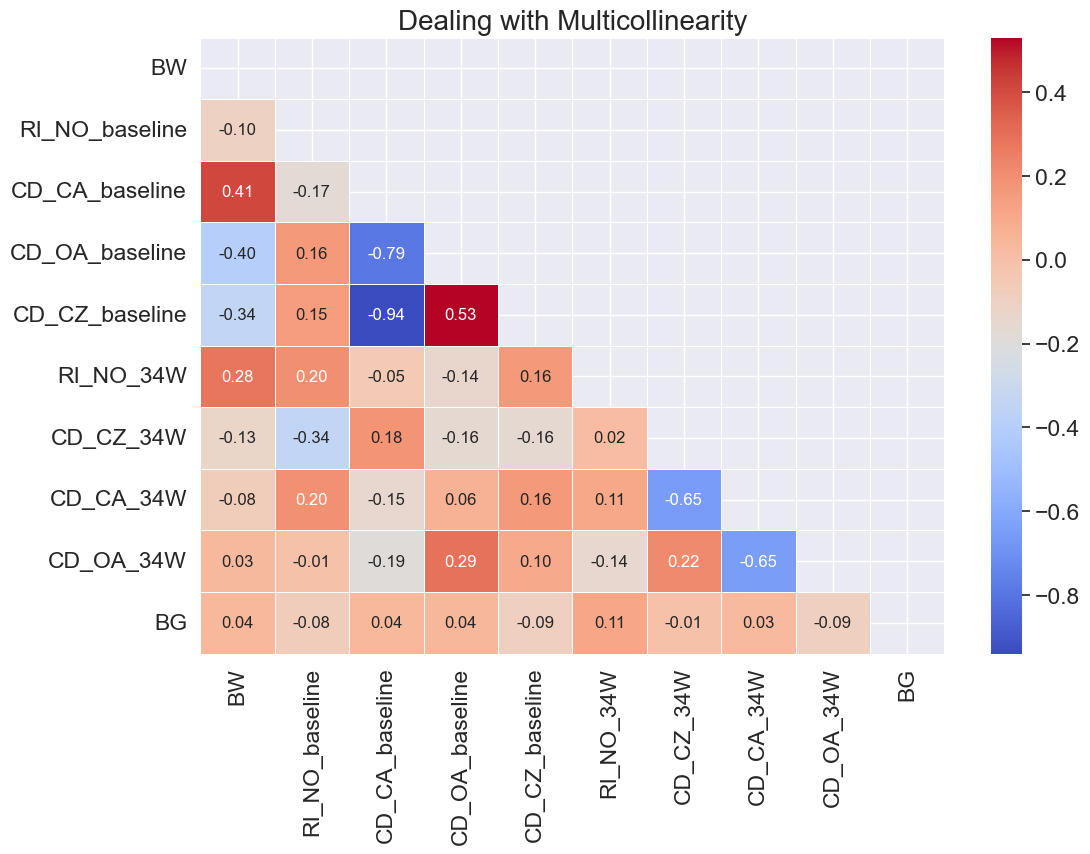

In [124]:
import plotly.express as px
mask = np.zeros_like(df_after_34W_corr)
mask[np.triu_indices_from(mask)] = True # to hide half of the matrix
f, ax = plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.5)
ax = sns.heatmap(df_after_34W_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title("Dealing with Multicollinearity", fontsize=20)
plt.show()

conclusion: There are positive correlations between Blood Glucose and body weight,CD_CA_baseline, CD_OA_baseline and RI_NO_34W and CD_CA_34W nad negative correlation between blood glucose and RI_NO_baseline, CD_CZ_baseline and CD_CZ_34W.

In [125]:
#df_after_34W = df_after_34W.drop('CD_CZ_34W', axis=1)

In [126]:
X = df_after_34W.drop('BG', axis=1)
y = df_after_34W['BG']

In [127]:
num_df_after_34W = X.select_dtypes(np.number)
cat_df_after_34W = X.select_dtypes(object)

In [128]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_df_after_34W_scaled = pd.DataFrame(scaler.fit_transform(num_df_after_34W), columns=scaler.get_feature_names_out())
num_df_after_34W_scaled

,BW,RI_NO_baseline,CD_CA_baseline,CD_OA_baseline,CD_CZ_baseline,RI_NO_34W,CD_CA_34W,CD_OA_34W
0,0.86,0.67,1.00,0.00,0.02,0.78,0.10,0.63
1,0.93,0.80,0.70,0.29,0.24,0.77,0.70,0.21
2,0.43,0.62,0.88,0.12,0.09,0.57,0.15,0.26
3,0.44,0.59,0.73,0.31,0.17,0.54,0.56,0.07
4,0.36,0.02,0.63,0.42,0.25,0.96,0.66,0.00
5,0.22,0.56,0.55,0.26,0.44,0.30,0.74,0.00
6,0.94,0.00,0.73,0.17,0.25,0.31,0.20,0.50
7,0.17,0.39,0.71,0.18,0.27,0.42,0.11,0.21
8,0.60,0.88,0.52,0.51,0.33,0.69,0.76,0.17
9,0.65,0.71,0.69,0.24,0.25,0.54,0.81,0.00


In [129]:
cat_df_after_34W_encoded = pd.get_dummies(cat_df_after_34W).reset_index(drop=True)
cat_df_after_34W_encoded

,treated/ untreated/ Sham_Sham,treated/ untreated/ Sham_treated,treated/ untreated/ Sham_untreated
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [130]:
y = df_after_34W['BG']
y.head(5)

0    284
1    353
2    335
3    320
4    500
Name: BG, dtype: int64

In [131]:
X_prep = pd.concat([num_df_after_34W_scaled, cat_df_after_34W_encoded], axis=1)
X_prep

,BW,RI_NO_baseline,CD_CA_baseline,CD_OA_baseline,CD_CZ_baseline,RI_NO_34W,CD_CA_34W,CD_OA_34W,treated/ untreated/ Sham_Sham,treated/ untreated/ Sham_treated,treated/ untreated/ Sham_untreated
0,0.86,0.67,1.00,0.00,0.02,0.78,0.10,0.63,0,0,1
1,0.93,0.80,0.70,0.29,0.24,0.77,0.70,0.21,0,0,1
2,0.43,0.62,0.88,0.12,0.09,0.57,0.15,0.26,0,0,1
3,0.44,0.59,0.73,0.31,0.17,0.54,0.56,0.07,0,0,1
4,0.36,0.02,0.63,0.42,0.25,0.96,0.66,0.00,0,0,1
5,0.22,0.56,0.55,0.26,0.44,0.30,0.74,0.00,0,0,1
6,0.94,0.00,0.73,0.17,0.25,0.31,0.20,0.50,0,0,1
7,0.17,0.39,0.71,0.18,0.27,0.42,0.11,0.21,0,0,1
8,0.60,0.88,0.52,0.51,0.33,0.69,0.76,0.17,0,0,1
9,0.65,0.71,0.69,0.24,0.25,0.54,0.81,0.00,0,0,1


In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prep, y, random_state=42, test_size=0.3)

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [134]:
# Assuming X_train and y_train are your training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Access the coefficients
coefficients = model.coef_
intercept = model.intercept_

In [135]:
# get train test accuracy
print("train data accuracy was ", round(model.score(X_train, y_train), 4))
print("test data accuracy was ", round(model.score(X_test, y_test), 4))

train data accuracy was  0.8571
test data accuracy was  0.0


In [136]:
# Get test data accuracy manually from the predictions
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.0

Conclusion: As dataset is very small so logistic model is not good for it.